In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-06-06 17:19:11


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from time import time

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# Data concat

## Before Data

In [13]:
import glob
import os

before_path = r'/home/jovyan/work/Documents/CASA/modules/diss/data/Before' # Before Path
all_before_files = glob.glob(before_path + "/*.csv")

li = []

for filename in all_before_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

before_frame = pd.concat(li, axis=0, ignore_index=True)

In [14]:
before_frame['Start Date'] = pd.to_datetime(before_frame['Start Date'], format="%d/%m/%Y %H:%M")

before_frame['End Date'] = pd.to_datetime(before_frame['End Date'], format="%d/%m/%Y %H:%M")
before_frame

filtered_b_frame = before_frame.loc[(before_frame['Start Date'] > '2019-10-14 23:59')
                     & (before_frame['Start Date'] < '2019-11-16 00:00')]
filtered_b_frame

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
5,92172956,720,4695,2019-10-15 18:39:00,228,"St. James's Square, St. James's",2019-10-15 18:27:00,303,"Albert Gate, Hyde Park"
6,92170239,420,10201,2019-10-15 18:00:00,40,"Commercial Street, Shoreditch",2019-10-15 17:53:00,446,"York Hall, Bethnal Green"
18,92165068,1200,14893,2019-10-15 16:50:00,553,"Regent's Row , Haggerston",2019-10-15 16:30:00,806,"Handyside Street, King's Cross"
20,92178745,660,11549,2019-10-15 21:49:00,374,"Waterloo Station 1, Waterloo",2019-10-15 21:38:00,341,"Craven Street, Strand"
24,92175656,1800,5534,2019-10-15 19:50:00,37,"Penywern Road, Earl's Court",2019-10-15 19:20:00,668,"Ravenscourt Park Station, Hammersmith"
...,...,...,...,...,...,...,...,...,...
1072769,92998802,420,9324,2019-11-15 07:57:00,194,"Hop Exchange, The Borough",2019-11-15 07:50:00,272,"Baylis Road, Waterloo"
1072770,93001274,1080,14670,2019-11-15 08:56:00,239,"Warren Street Station, Euston",2019-11-15 08:38:00,272,"Baylis Road, Waterloo"
1072771,92939043,720,6224,2019-11-13 08:22:00,126,"Museum of London, Barbican",2019-11-13 08:10:00,272,"Baylis Road, Waterloo"
1072772,93004159,360,16868,2019-11-15 09:44:00,295,"Swan Street, The Borough",2019-11-15 09:38:00,272,"Baylis Road, Waterloo"


### Start station + start date + weekdays

In [38]:
start_b=filtered_b_frame.drop(labels=['StartStation Name', 'EndStation Name', 'End Date','Duration','Rental Id','Bike Id','EndStation Id'], axis=1)
start_b

,Start Date,StartStation Id
5,2019-10-15 18:27:00,303
6,2019-10-15 17:53:00,446
18,2019-10-15 16:30:00,806
20,2019-10-15 21:38:00,341
24,2019-10-15 19:20:00,668
...,...,...
1072769,2019-11-15 07:50:00,272
1072770,2019-11-15 08:38:00,272
1072771,2019-11-13 08:10:00,272
1072772,2019-11-15 09:38:00,272


In [334]:
#drop weekend
start_b["weekday"] = pd.to_datetime(start_b['Start Date']).dt.dayofweek
start_b["hour"] = pd.to_datetime(start_b['Start Date']).dt.hour
#start_b
start_wkday_b = start_b.drop(start_b.loc[start_b["weekday"] > 4].index)
start_wkday_b=start_wkday_b.drop(labels=['weekday'], axis=1)
start_wkday_b

,Start Date,StartStation Id,hour
5,2019-10-15 18:27:00,303,18
6,2019-10-15 17:53:00,446,17
18,2019-10-15 16:30:00,806,16
20,2019-10-15 21:38:00,341,21
24,2019-10-15 19:20:00,668,19
...,...,...,...
1072769,2019-11-15 07:50:00,272,7
1072770,2019-11-15 08:38:00,272,8
1072771,2019-11-13 08:10:00,272,8
1072772,2019-11-15 09:38:00,272,9


In [451]:
#count number trips by hours
start_wkday_b1=start_wkday_b.groupby([pd.Grouper(key='StartStation Id'),start_wkday_b['hour']]).size().reset_index(name='count')
#count all number trips by hour
#start_wkday_b1['avg_hour'] = start_wkday_b1.groupby('hour')['count'].transform('mean')
#start_wkday_b1['hour_count'] = start_wkday_b1.groupby('hour')['count'].transform('sum')

#start_wkday_b1['total'] = start_wkday_b1.groupby('hour').agg({'count':'count'})
start_wkday_b1['avg_daily_total'] = start_wkday_b1.groupby('StartStation Id')['count'].transform('sum')
print(start_wkday_b1)
#start_wkday_b1.to_csv('start_wkday_b1.csv')

       StartStation Id  hour  count  avg_daily_total
0                    1     0      4              543
1                    1     1      3              543
2                    1     2      2              543
3                    1     4      1              543
4                    1     5      6              543
...                ...   ...    ...              ...
16838              839    19    128             1744
16839              839    20     49             1744
16840              839    21     23             1744
16841              839    22     24             1744
16842              839    23     22             1744

[16843 rows x 4 columns]


In [452]:
# nomalized
start_wkday_b1['r_b'] = start_wkday_b1['count']/start_wkday_b1['avg_daily_total']
start_wkday_b1
#start_wkday_b1.to_csv('start_wkday_b1.csv')

,StartStation Id,hour,count,avg_daily_total,r_b
0,1,0,4,543,0.0074
1,1,1,3,543,0.0055
2,1,2,2,543,0.0037
3,1,4,1,543,0.0018
4,1,5,6,543,0.0110
...,...,...,...,...,...
16838,839,19,128,1744,0.0734
16839,839,20,49,1744,0.0281
16840,839,21,23,1744,0.0132
16841,839,22,24,1744,0.0138


In [453]:
#make pivot in size N(785) station*24
#start_wkday_b1
start_wkday_b2=start_wkday_b1.drop(labels=['count', 'avg_daily_total'], axis=1)

start_wkday_b3=start_wkday_b2.pivot_table(columns='hour', index='StartStation Id', values='r_b').reset_index()
start_wkday_b3.fillna(0)

start_wkday_b3.set_index('StartStation Id', inplace=True)
start_wkday_b3

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
StartStation Id,,,,,,,,,,,,,,,,,,,,,
1,0.0074,0.0055,0.0037,NaN,0.0018,0.0110,0.0645,0.1510,0.1842,0.0810,...,0.0258,0.0368,0.0424,0.0994,0.0792,0.0460,0.0110,0.0092,0.0037,0.0092
2,0.0114,NaN,NaN,0.0042,0.0021,0.0062,0.0187,0.0156,0.0998,0.0655,...,0.0447,0.0821,0.0655,0.1143,0.1351,0.0655,0.0281,0.0125,0.0156,0.0270
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0018,0.0272,0.0879,0.0211,...,0.0325,0.0659,0.1169,0.2979,0.1309,0.0343,0.0202,0.0088,0.0088,NaN
4,0.0064,0.0064,0.0129,NaN,0.0043,NaN,0.0021,0.0815,0.2060,0.1223,...,0.0365,0.0215,0.0687,0.0515,0.0708,0.0408,0.0215,0.0215,0.0086,0.0107
5,0.0035,NaN,0.0007,NaN,0.0007,0.0021,0.0153,0.0257,0.0680,0.0743,...,0.0361,0.0444,0.0770,0.1409,0.1700,0.0840,0.0326,0.0354,0.0243,0.0160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0.0018,NaN,0.0089,0.0018,0.0107,0.0018,0.0213,0.0480,0.2256,0.0906,...,0.0320,0.0373,0.0355,0.0764,0.0675,0.0693,0.0782,0.0266,0.0107,0.0142
835,0.0013,0.0013,NaN,0.0013,NaN,NaN,NaN,0.0026,0.0316,0.0145,...,0.0263,0.0250,0.0789,0.2803,0.3105,0.0882,0.0250,0.0224,0.0053,0.0039
836,0.0060,0.0104,0.0149,0.0030,0.0343,0.0075,0.0388,0.1090,0.1955,0.1209,...,0.0194,0.0418,0.0507,0.0537,0.0567,0.0343,0.0134,0.0104,0.0179,0.0045


In [454]:
# standardisation of the X. This is essential for PCA.
import sys
import numpy
from sklearn.preprocessing import StandardScaler
numpy.set_printoptions(threshold=False)

hour = start_wkday_b3.columns.tolist()
#scaled_data = preprocessing.scale(start_wkday_b3)

X = StandardScaler().fit_transform(start_wkday_b3)
#pca = PCA(n_components=24)
X[np.isnan(X)] = 0
X

array([[ 0.12358695,  0.38081847,  0.11260125, ..., -1.07156862,
        -1.21858399, -0.38512092],
       [ 0.82718736,  0.        ,  0.        , ..., -0.85944253,
        -0.32887837,  1.57410614],
       [ 0.        ,  0.        ,  0.        , ..., -1.09889746,
        -0.83727185,  0.        ],
       ...,
       [-0.11792083,  1.78505739,  4.01675566, ..., -0.99105082,
        -0.15571272, -0.90524809],
       [ 0.        ,  0.        ,  0.        , ..., -1.48922863,
         0.        ,  0.        ],
       [-0.45629483,  0.        , -0.9673827 , ..., -0.81306312,
        -0.46567037, -0.01056096]])

In [475]:
from sklearn.decomposition import PCA
#rand_st_int = 10 
pca = PCA()
# fit the components
pca.fit(X)
X_new_components = pca.fit_transform(X)

In [487]:
pca.components_[0][7]

0.3302280981372037

In [477]:
#pca

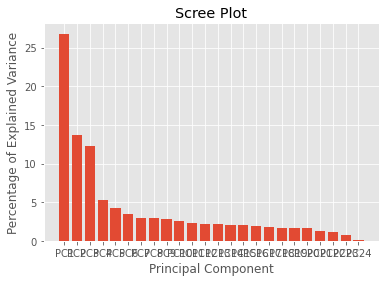

In [478]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [479]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.26778485 0.13650458 0.12339376 ... 0.0120454  0.00729585 0.0012201 ]


In [480]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[5.75293389 2.93258491 2.6509198  ... 0.25877644 0.15673981 0.02621188]


In [481]:
pca.n_components_

24

In [482]:
#start_wkday_b3=start_wkday_b3.T
#start_wkday_b3
hour

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [483]:
#X_wkday3 = pd.DataFrame(X.T,columns=hour)
#X_wkday3

In [491]:
pca.components_[0]

array([-0.00596153,  0.016857  ,  0.01455795, ..., -0.11579022,
       -0.0684805 , -0.05812312])

In [493]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_.transpose(),columns=PCnames,index=hour)

Loadings.iloc[:,:2]

,PC1,PC2
0,-0.0060,0.1810
1,0.0169,0.0696
2,0.0146,0.0086
3,-0.0101,-0.0147
4,0.0251,0.0024
5,0.0703,-0.0070
6,0.2532,0.0455
7,0.3302,0.0211
8,0.3701,-0.0344
9,0.2556,-0.1032


In [494]:
Loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-0.0060,0.1810,0.2379,-0.1588,0.5455,0.1541,-0.2902,-0.2354,-0.2101,-0.3421,...,0.1840,-0.0071,-0.1247,0.1588,-0.1427,-0.1459,-0.1200,0.0745,0.0151,0.0407
1,0.0169,0.0696,0.1838,-0.1920,0.4212,0.0205,0.2195,0.3320,-0.1894,0.0718,...,-0.3208,0.2857,0.0915,0.0523,0.0382,-0.0721,0.0202,-0.0940,0.0411,0.0226
2,0.0146,0.0086,0.1197,-0.0409,0.1635,-0.0599,0.2768,0.2910,-0.1447,-0.1379,...,0.0415,-0.2315,-0.1163,-0.2012,-0.4433,0.1154,-0.0220,0.0316,-0.0019,0.0146
3,-0.0101,-0.0147,0.0883,-0.1010,0.1457,0.0139,-0.0480,0.1528,-0.1645,0.1108,...,0.3396,0.0241,0.5891,0.0401,0.5290,0.0071,0.0659,-0.0434,0.0162,0.0144
4,0.0251,0.0024,0.0511,-0.0631,0.0519,-0.1341,0.1638,0.3088,0.1621,-0.0426,...,-0.2218,-0.2133,-0.2795,0.2393,0.3519,0.1821,0.1378,0.1981,-0.0295,0.0415
5,0.0703,-0.0070,0.0358,-0.1928,0.3354,-0.3600,-0.1799,0.2212,0.4901,0.4011,...,0.2592,0.0225,-0.1746,-0.1601,-0.0730,-0.0356,0.0038,-0.0767,-0.0200,0.0709
6,0.2532,0.0455,-0.0186,-0.4031,-0.1220,-0.2558,0.1313,-0.4094,-0.0312,-0.0926,...,0.1727,0.3095,-0.1353,-0.2531,0.0857,0.0290,0.0901,-0.2063,0.0218,0.1326
7,0.3302,0.0211,-0.0502,-0.3205,-0.1201,-0.1338,0.1963,-0.0733,0.0023,-0.0201,...,-0.1555,-0.0911,0.2341,0.1028,-0.0557,-0.2092,-0.1916,0.5700,-0.0368,0.3657
8,0.3701,-0.0344,0.0109,0.0189,-0.0882,0.1977,-0.0869,0.1301,-0.1038,-0.0307,...,-0.0321,-0.1148,-0.1125,0.1342,0.0133,0.1914,0.1189,-0.4866,-0.0489,0.5879
9,0.2556,-0.1032,0.1729,0.4814,0.0145,0.1433,-0.2023,0.1618,-0.0496,0.0167,...,0.2851,0.0668,-0.0802,-0.2867,0.0563,-0.0492,-0.0161,0.3665,0.0092,0.2869


## During Data

In [11]:
import glob
import os

during_path = r'/home/jovyan/work/Documents/CASA/modules/diss/data/During' # Before Path
all_during_files = glob.glob(during_path + "/*.csv")

lid = []

for filename in all_during_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    lid.append(df)

during_frame = pd.concat(lid, axis=0, ignore_index=True)

during_frame['Start Date'] = pd.to_datetime(during_frame['Start Date'], format="%d/%m/%Y %H:%M")
during_frame['End Date'] = pd.to_datetime(during_frame['End Date'], format="%d/%m/%Y %H:%M")
#during_frame

filtered_d_frame = during_frame.loc[(during_frame['Start Date'] > '2020-10-14 23:59')
                     & (during_frame['Start Date'] < '2020-11-16 00:00')]

filtered_d_frame

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,102889854,480,16883,2020-10-15 08:52:00,97,"Gloucester Road (North), Kensington",2020-10-15 08:44:00,225,"Notting Hill Gate Station, Notting Hill"
1,103024218,420,17755,2020-10-19 09:12:00,97,"Gloucester Road (North), Kensington",2020-10-19 09:05:00,225,"Notting Hill Gate Station, Notting Hill"
2,102957581,480,14140,2020-10-17 11:39:00,97,"Gloucester Road (North), Kensington",2020-10-17 11:31:00,225,"Notting Hill Gate Station, Notting Hill"
4,102906253,660,17806,2020-10-15 18:07:00,622,"Lansdowne Road, Ladbroke Grove",2020-10-15 17:56:00,97,"Gloucester Road (North), Kensington"
5,102963722,660,14140,2020-10-17 13:51:00,622,"Lansdowne Road, Ladbroke Grove",2020-10-17 13:40:00,97,"Gloucester Road (North), Kensington"
...,...,...,...,...,...,...,...,...,...
930855,103715116,900,8412,2020-11-12 18:32:00,828,"Normandy Road, Stockwell",2020-11-12 18:17:00,828,"Normandy Road, Stockwell"
930856,103718514,1440,16482,2020-11-12 20:38:00,828,"Normandy Road, Stockwell",2020-11-12 20:14:00,828,"Normandy Road, Stockwell"
930858,103740103,180,18288,2020-11-13 18:05:00,772,"Binfield Road, Stockwell",2020-11-13 18:02:00,828,"Normandy Road, Stockwell"
930859,103776172,1020,1031,2020-11-15 14:35:00,370,"Paddington Green, Paddington",2020-11-15 14:18:00,751,"Newton Street, Covent Garden"


## After Data

In [10]:
import glob
import os

after_path = r'/home/jovyan/work/Documents/CASA/modules/diss/data/After' # Before Path
all_after_files = glob.glob(after_path + "/*.csv")

lia = []

for filename in all_after_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    lia.append(df)

after_frame = pd.concat(lia, axis=0, ignore_index=True)
after_frame['Start Date'] = pd.to_datetime(after_frame['Start Date'], format="%d/%m/%Y %H:%M")
after_frame['End Date'] = pd.to_datetime(after_frame['End Date'], format="%d/%m/%Y %H:%M")

#after_frame
filtered_a_frame = after_frame.loc[(after_frame['Start Date'] > '2021-10-14 23:59:00')
                     & (after_frame['Start Date'] < '2021-11-16 00:00:00')]

filtered_a_frame

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,113856950,240,12953,2021-10-19 13:10:00,605,"Seymour Place, Marylebone",2021-10-19 13:06:00,99,"Old Quebec Street, Marylebone"
2,113775911,300,17398,2021-10-16 23:48:00,310,"Black Prince Road, Vauxhall",2021-10-16 23:43:00,149,"Kennington Road Post Office, Oval"
3,113875813,1200,20315,2021-10-19 20:52:00,14,"Belgrove Street , King's Cross",2021-10-19 20:32:00,541,"Green Park Station, Mayfair"
4,113867536,1380,20233,2021-10-19 18:11:00,228,"St. James's Square, St. James's",2021-10-19 17:48:00,773,"Tallis Street, Temple"
5,113719461,720,13517,2021-10-15 15:03:00,624,"Courland Grove, Wandsworth Road",2021-10-15 14:51:00,440,"Kennington Oval, Oval"
...,...,...,...,...,...,...,...,...,...
1193700,114742579,2760,21209,2021-11-13 22:06:00,228,"St. James's Square, St. James's",2021-11-13 21:20:00,296,"Knaresborough Place, Earl's Court"
1193701,114709279,60,21351,2021-11-12 23:36:00,155,"Lexham Gardens, Kensington",2021-11-12 23:35:00,296,"Knaresborough Place, Earl's Court"
1193703,114700079,240,9409,2021-11-12 17:44:00,405,"Gloucester Road Station, South Kensington",2021-11-12 17:40:00,296,"Knaresborough Place, Earl's Court"
1193704,114672074,540,20741,2021-11-11 18:56:00,428,"Exhibition Road, Knightsbridge",2021-11-11 18:47:00,296,"Knaresborough Place, Earl's Court"
